# Lifecycle In A Data Science Projects
Data Analysis

Feature Engineering

Feature Selection

Model Building

Model Deployment

#Exploratory Data Analysis Cases:¶
Missing Values

Identified all Numerical Variables (Discrete + Continuous) and Categorical 

Variables separately

Distribution of the Numerical Variables

Cardinality of Categorical Variables

Outliers Detection

Relationship between independent and dependent feature(SalePrice)

In [1]:
# pip install seaborn
# pip install pip

# pip install pip

In [2]:
#Importing the Essential Libraries, Metrics

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy import stats
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

%matplotlib inline

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#Loading the Data

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
print(f'train df shape is {train_df.shape}')
print('-' * 50)
print(f'test df shape is {test_df.shape}')

train df shape is (1460, 81)
--------------------------------------------------
test df shape is (1459, 80)


In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
missing_df = train_df.isnull().sum() / len(train_df)
missing_df[missing_df > 0.40]

missing_df_2 = test_df.isnull().sum() / len(test_df)
missing_df_2[missing_df_2 > 0.40]


train_df.drop(columns = missing_df[missing_df > 0.40].index,axis=1,inplace=True)
test_df.drop(columns = missing_df_2[missing_df_2 > 0.40].index,axis=1,inplace=True)

In [9]:
train_df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [10]:
train_df.drop(columns='Id',axis=1,inplace=True)


In [11]:
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
print(f'Number of Numerical Features are {len(numerical_features)}')

Number of Numerical Features are 37


In [12]:
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtypes == 'O']
print(f'Number of Categorical Features are {len(categorical_features)}')

Number of Categorical Features are 38


In [13]:
#Temporal Variables(Eg: Datetime Variables) From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days.
#One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.
# We will be performing this analysis in the Feature Engineering which is the next video.

In [14]:
year_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature ]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
for feature in year_features:
    print(feature,train_df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

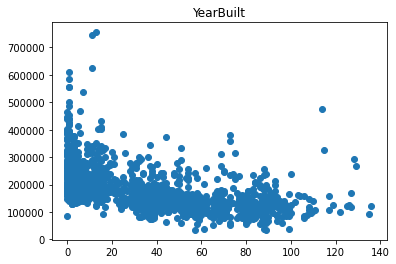

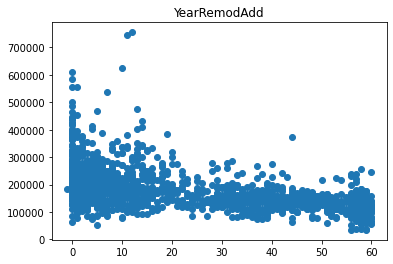

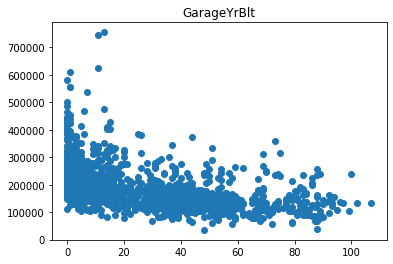

In [16]:
for feature in year_features:
    data = train_df.copy()
    if feature != 'YrSold':
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

In [17]:
## Numerical variables are usually of 2 type
### Continous variable and Discrete Variables

discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique()) < 25 and feature not in year_features]
print("Discrete Variables Count: ",len(discrete_features))

Discrete Variables Count:  17


In [18]:
continuous_features =  [feature for feature in numerical_features if feature not in discrete_features and feature not in year_features]
print("Continuous Variables Count: ",len(continuous_features))

Continuous Variables Count:  16


In [19]:
train_df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


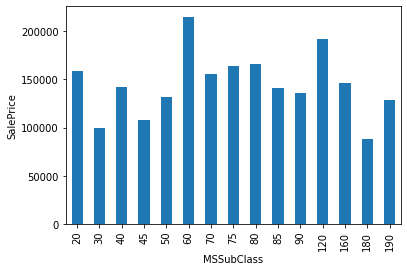

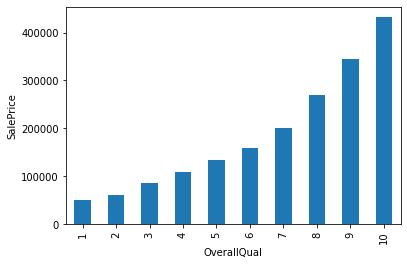

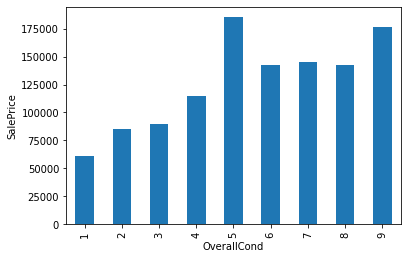

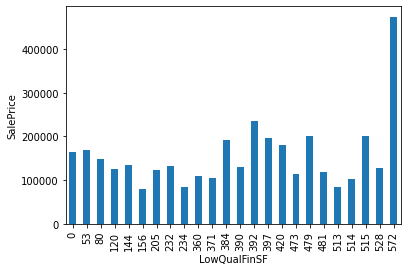

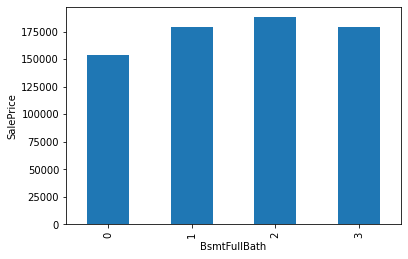

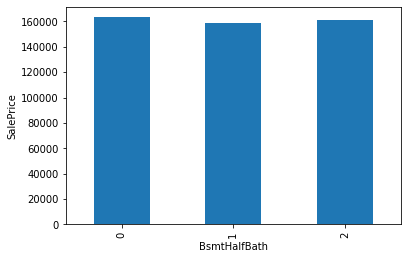

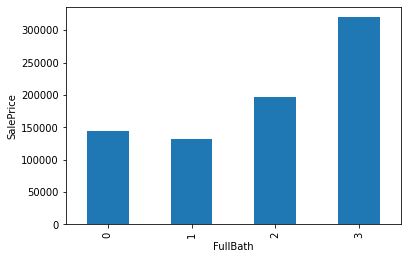

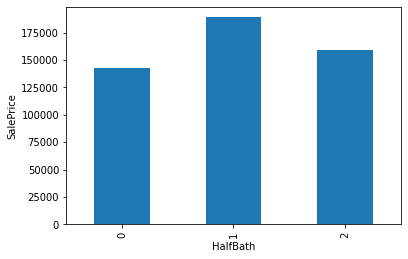

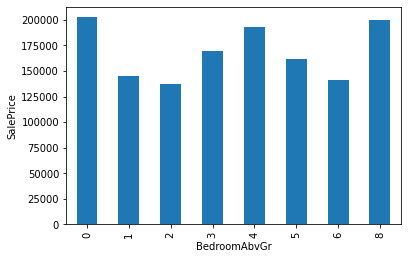

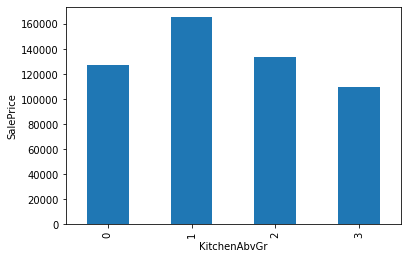

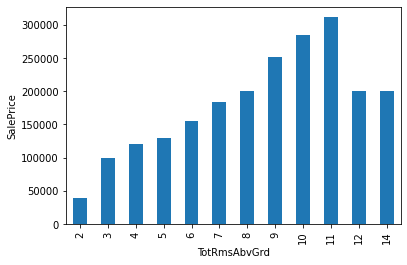

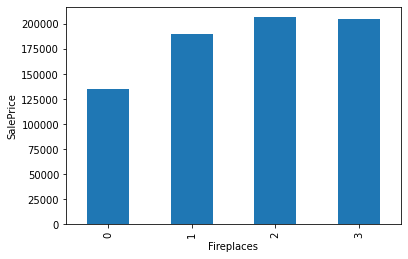

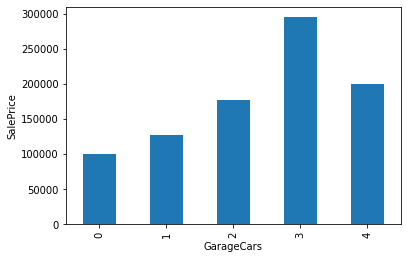

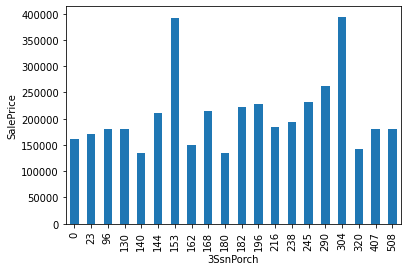

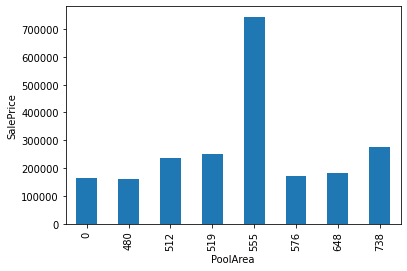

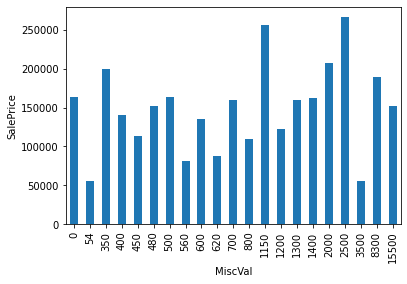

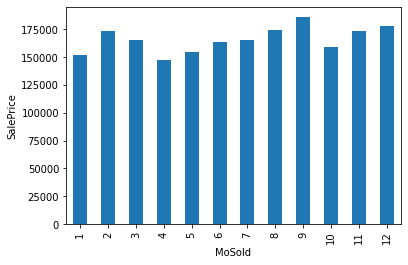

In [20]:
for feature in discrete_features:
    data = train_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

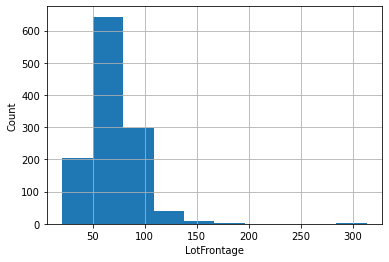

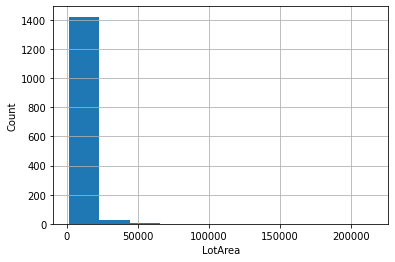

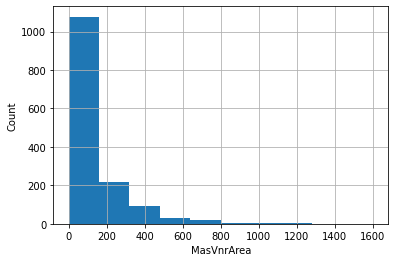

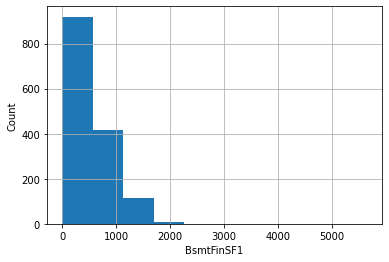

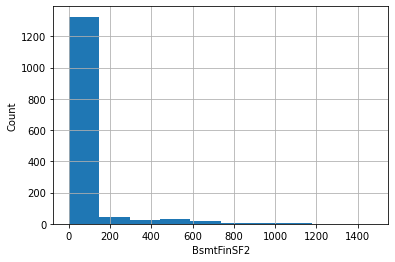

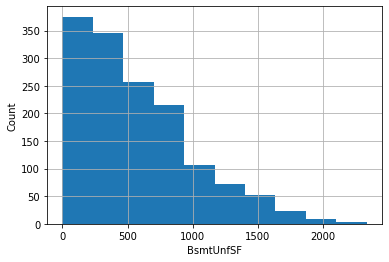

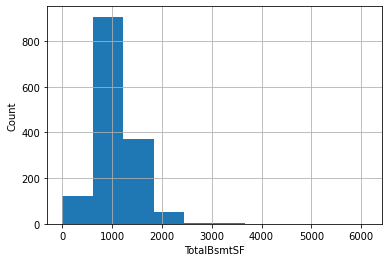

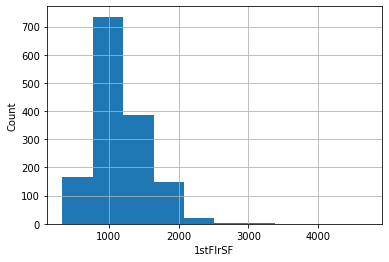

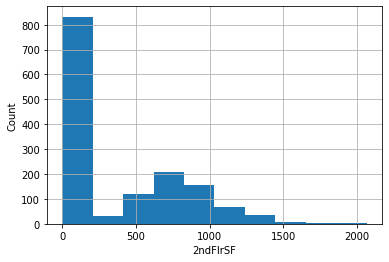

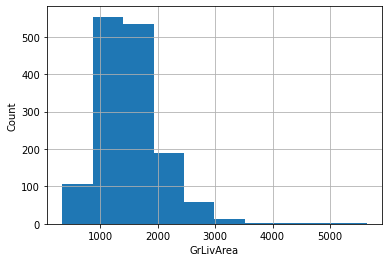

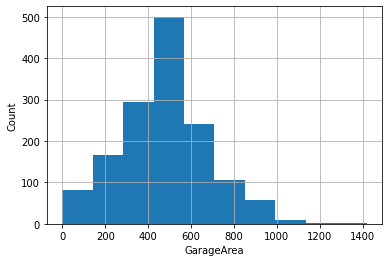

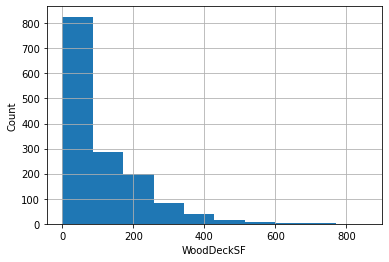

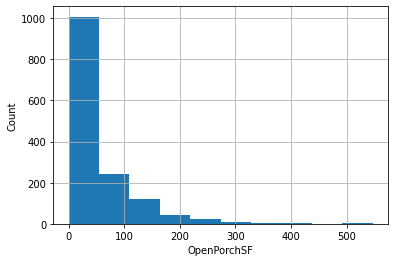

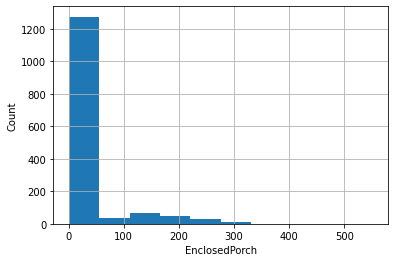

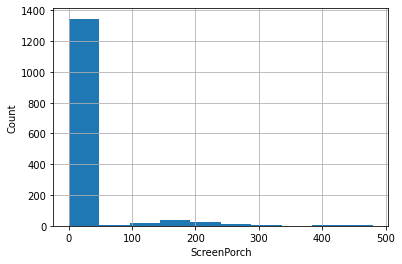

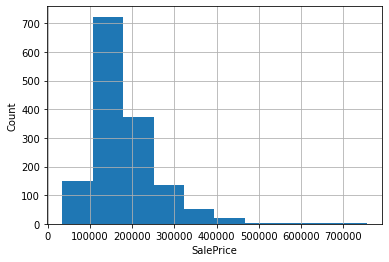

In [21]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    data = train_df.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

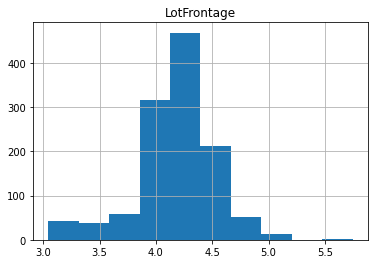

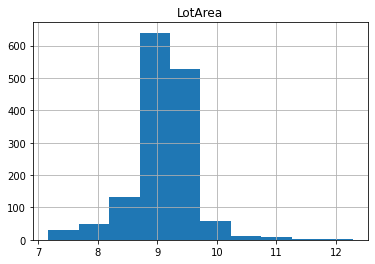

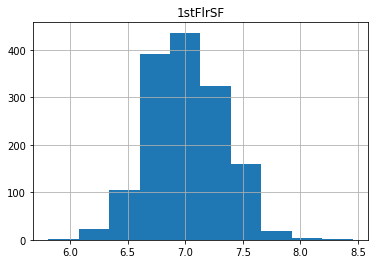

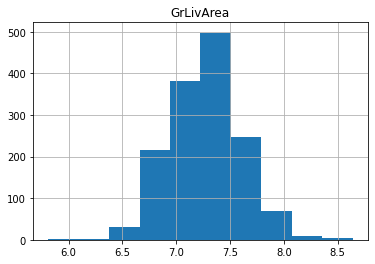

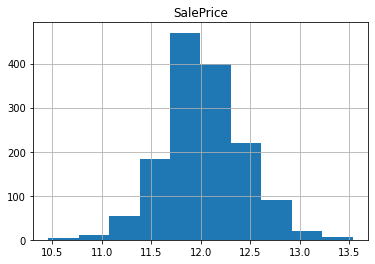

In [22]:
## Here, we observe that some of the features don't follow the gaussian distribution. We can apply log transformation further.
## We will be using logarithmic transformation

for feature in continuous_features:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data[feature].hist()
        plt.title(feature)
        plt.show()

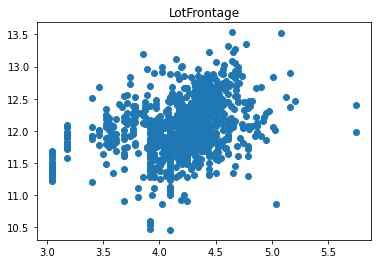

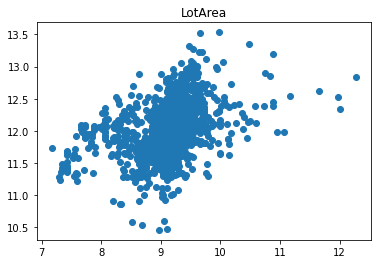

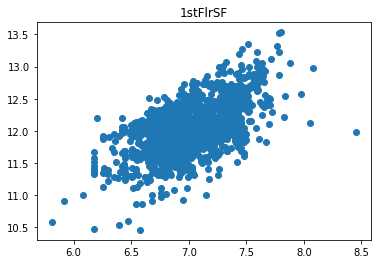

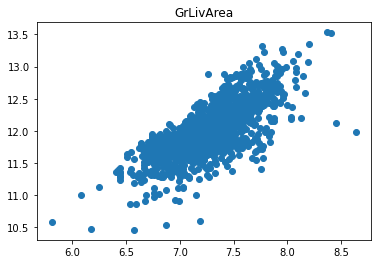

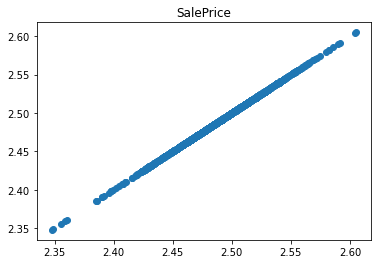

In [23]:
# let's see the relationship between SalePrice and these continuous variales

for feature in continuous_features:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

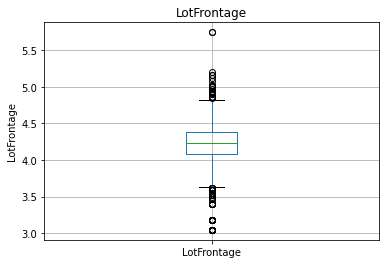

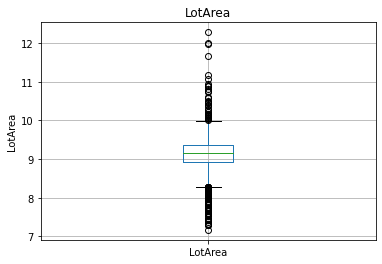

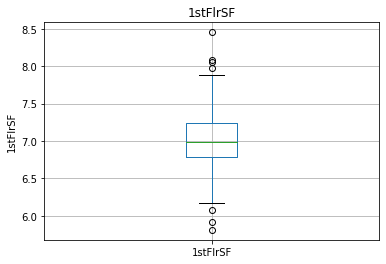

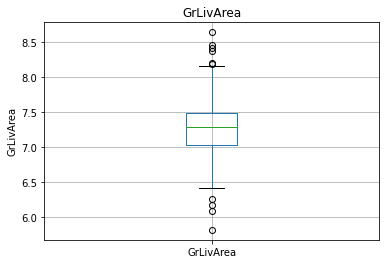

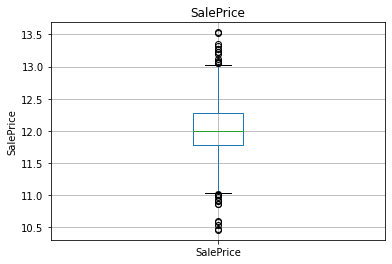

In [24]:
# Outliers Detection

for feature in continuous_features:
    data=train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [25]:
train_df[categorical_features].head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [26]:
for feature in categorical_features:
    data = train_df.copy()
    print(f'The feature is {feature} and no of categories are {len(data[feature].unique())}')

The feature is MSZoning and no of categories are 5
The feature is Street and no of categories are 2
The feature is LotShape and no of categories are 4
The feature is LandContour and no of categories are 4
The feature is Utilities and no of categories are 2
The feature is LotConfig and no of categories are 5
The feature is LandSlope and no of categories are 3
The feature is Neighborhood and no of categories are 25
The feature is Condition1 and no of categories are 9
The feature is Condition2 and no of categories are 8
The feature is BldgType and no of categories are 5
The feature is HouseStyle and no of categories are 8
The feature is RoofStyle and no of categories are 6
The feature is RoofMatl and no of categories are 8
The feature is Exterior1st and no of categories are 15
The feature is Exterior2nd and no of categories are 16
The feature is MasVnrType and no of categories are 5
The feature is ExterQual and no of categories are 4
The feature is ExterCond and no of categories are 5
The

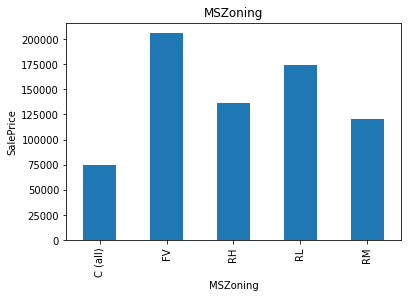

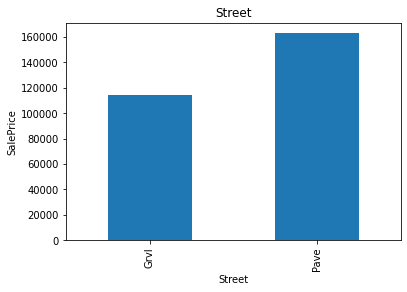

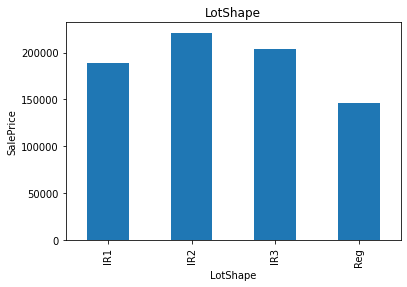

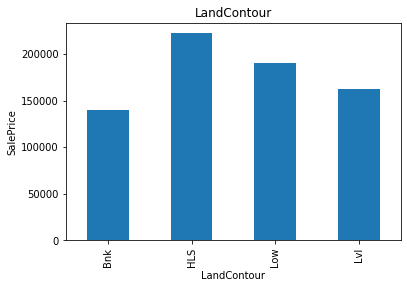

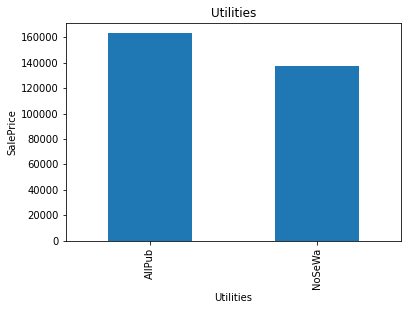

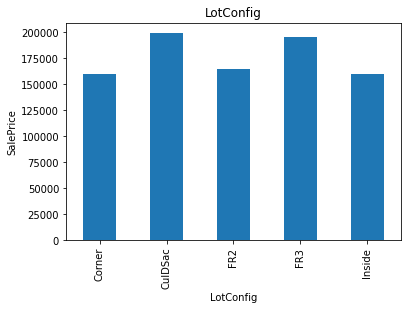

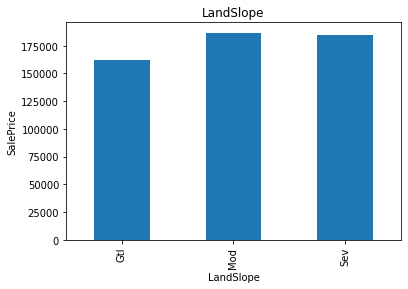

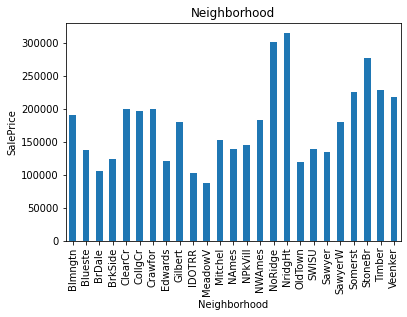

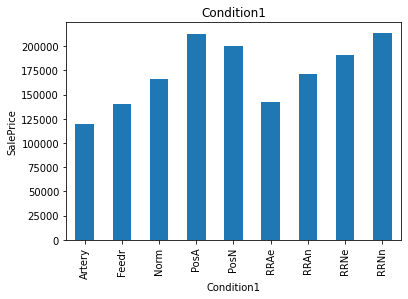

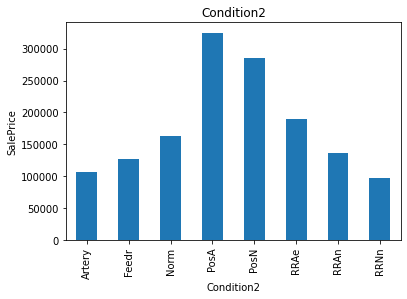

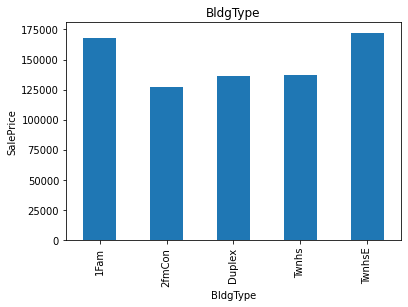

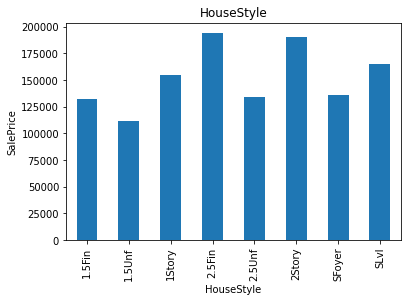

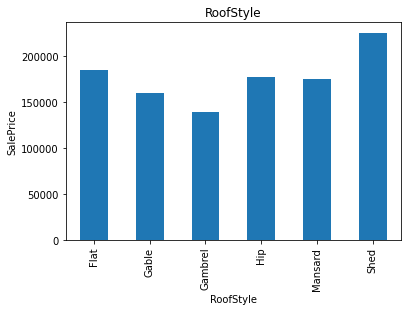

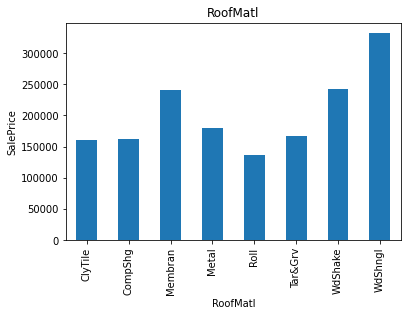

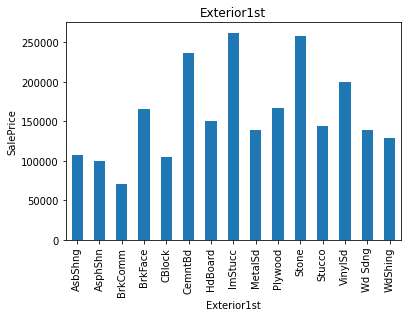

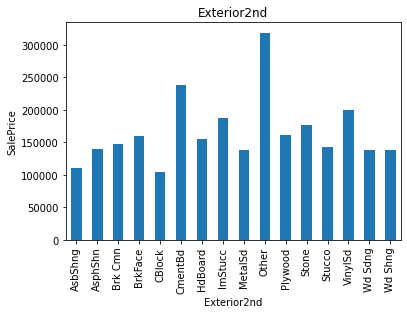

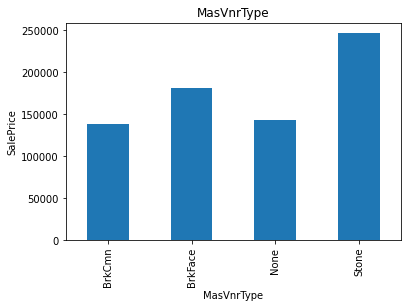

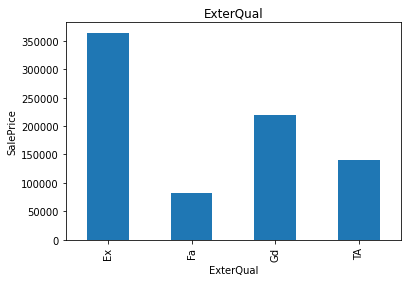

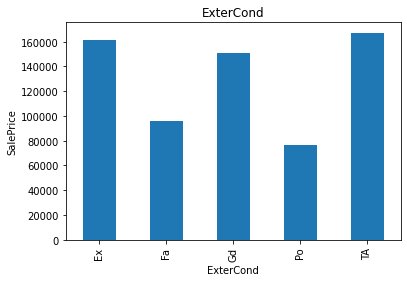

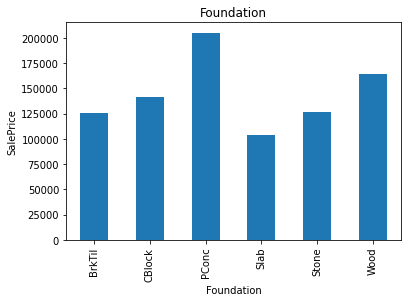

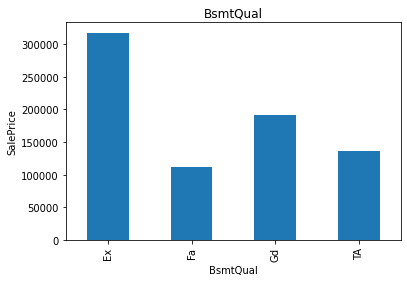

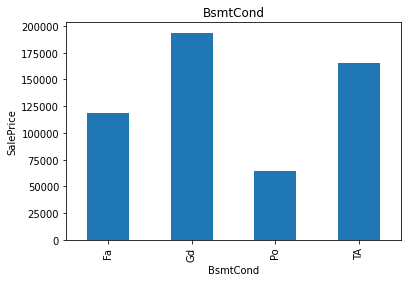

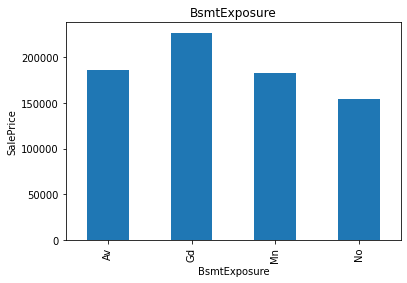

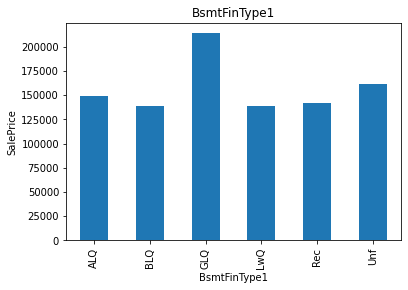

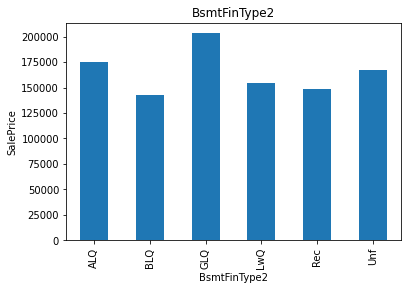

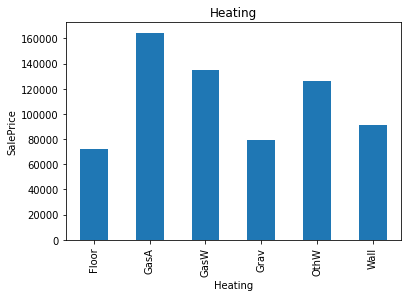

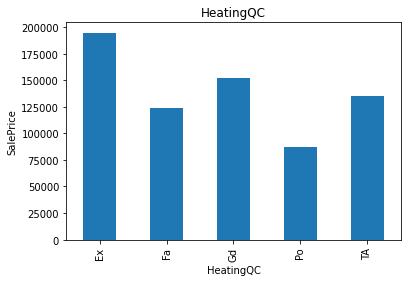

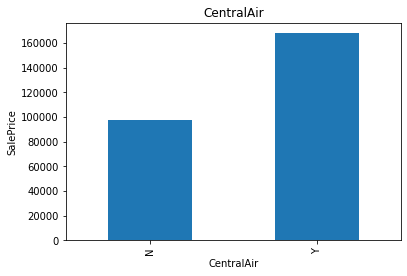

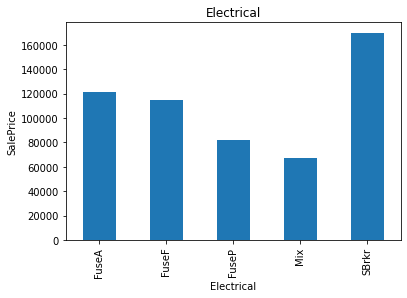

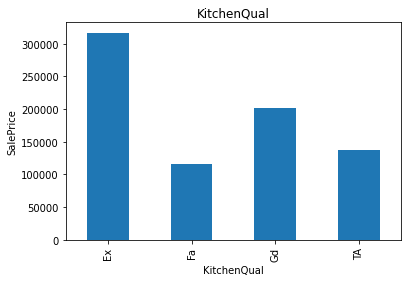

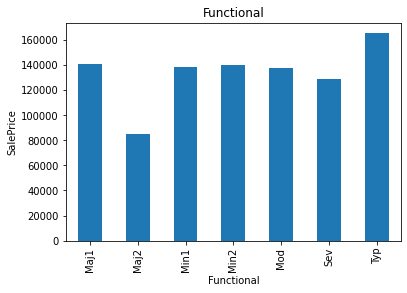

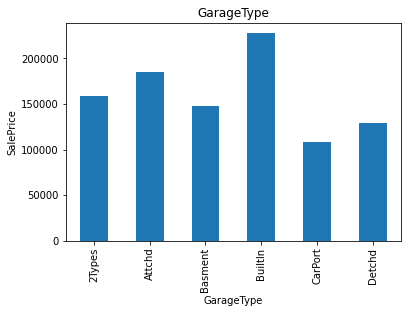

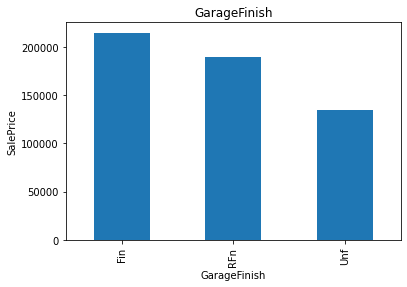

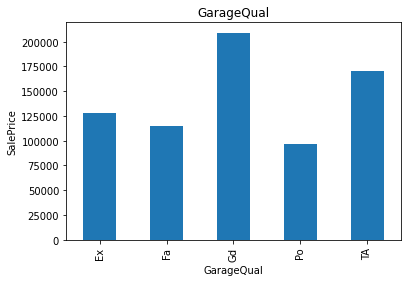

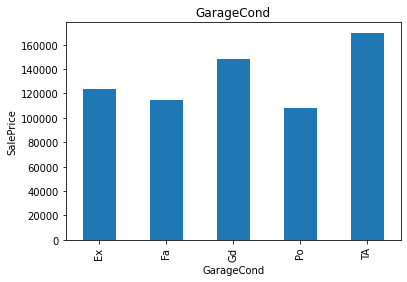

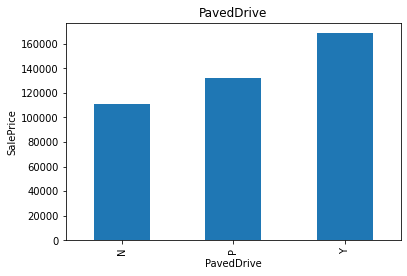

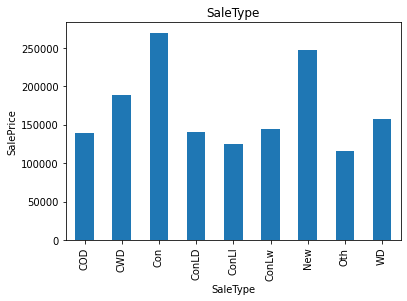

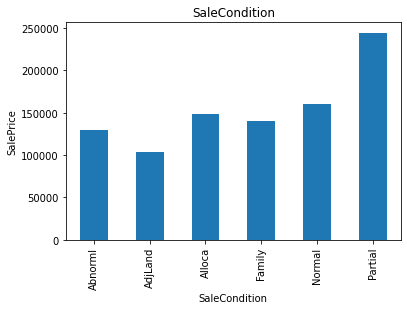

In [27]:
## Realtionship between target variable and categorical features

for feature in categorical_features:
    train_df.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [28]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing

categorical_features_nan = [feature for feature in train_df.columns if train_df[feature].isnull().sum() > 0 and train_df[feature].dtypes == 'O']


for feature in categorical_features_nan:
    print(f"{feature}: {np.round(train_df[feature].isnull().mean(),4)}% missing values")

MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
Electrical: 0.0007% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values


In [29]:
## Replace missing value with a new label

def replace_missing_nan_cat(dataset,features):
    data = dataset.copy()
    data[features] = data[features].fillna('Missing')
    return data

In [30]:
train_df = replace_missing_nan_cat(train_df,categorical_features)
test_df = replace_missing_nan_cat(test_df,categorical_features)

In [31]:
train_df[categorical_features].head(100)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [32]:
test_df[categorical_features].head(100)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
6,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,Gd,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
8,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [33]:
print(train_df[categorical_features_nan].isnull().sum())


MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


In [34]:
## Now lets check for numerical variables the contains missing values
numerical_features_nan = [feature for feature in train_df.columns if train_df[feature].isnull().sum() > 0 and train_df[feature].dtypes != 'O']
numerical_features_nan

for feature in numerical_features_nan:
    train_df[feature] = train_df[feature].fillna(train_df[feature].median())

In [35]:
## Now lets check for numerical variables in test data the contains missing values
numerical_features_nan = [feature for feature in test_df.columns if test_df[feature].isnull().sum() > 0 and test_df[feature].dtypes != 'O']
numerical_features_nan

for feature in numerical_features_nan:
    test_df[feature] = test_df[feature].fillna(test_df[feature].median())

In [36]:
print(train_df[numerical_features_nan].isnull().sum())


LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64


In [37]:
print(test_df[numerical_features_nan].isnull().sum())


LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64


In [38]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train_df[feature] = train_df['YrSold'] - train_df[feature]
    test_df[feature] = test_df['YrSold'] - test_df[feature]
    

In [39]:
train_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [40]:
test_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [41]:
num_continuous_features_log=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_continuous_features_log:
    train_df[feature] = np.log(train_df[feature])

In [42]:
# for test data 

num_continuous_features_log = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for feature in num_continuous_features_log:
    test_df[feature] = np.log(test_df[feature])

In [43]:
#Handling Rare Categorical Feature
#We will remove categorical variables that are present less than 1% of the observations
train_df[categorical_features].head(10)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [44]:
for feature in categorical_features:
    temp = train_df.groupby(feature)['SalePrice'].count() / len(train_df)
    train_df[feature] = np.where(train_df[feature].isin(temp[temp > 0.1].index),train_df[feature],'Others')

In [45]:
for feature in categorical_features:
    temp = test_df[feature].value_counts() / len(test_df)
    test_df[feature] = np.where(test_df[feature].isin(temp[temp > 0.1].index),test_df[feature],'Others')

In [46]:
train_df['MSZoning'].unique()


array(['RL', 'RM', 'Others'], dtype=object)

In [47]:
test_df['MSZoning'].unique()


array(['Others', 'RL', 'RM'], dtype=object)

In [48]:
train_df.head(50)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,Others,Gtl,Others,Others,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Others,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Others,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Others,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Others,None,0.0,TA,TA,Others,TA,Others,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Others,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,Others,Gtl,Others,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216
5,50,RL,4.442651,9.554993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Others,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Others,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,11.870600
6,20,RL,4.317488,9.218705,Pave,Reg,Lvl,AllPub,Inside,Gtl,Others,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Others,186.0,Gd,TA,PConc,Others,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,12.634603
7,60,RL,4.234107,9.247829,Pave,IR1,Lvl,AllPub,Corner,Gtl,Others,Others,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Others,240.0,TA,TA,CBlock,Gd,TA,Others,ALQ,859,Others,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,12.206073
8,50,RM,3.931826,8.719317,Pave,Reg,Lvl,AllPub,Inside,Gtl,Others,Others,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,Others,Others,None,0.0,TA,TA,Others,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,Others,6.929517,752,0,7.480992,0,0,2,0,2,2,TA,8,Others,2,Detchd,77.0,Unf,2,468,Others,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Others,11.774520
9,190,RL,3.912023,8.911934,Pave,Reg,Lvl,AllPub,Corner,Gtl,Others,Others,Others,Others,Others,5,6,69,58,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Others,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,6.981935,0,0,6.981935,1,0,1,0,2,2,TA,5,Typ,2,Attchd,69.0,RFn,1,205,Others,TA,Y,0,4,0,0,0,0,0,1,2

In [49]:
# Let's encode the categorical variables
## ordinal encoder encoded the values alphabetically e.g Sex(Male and Female) ~ it will be encoded as Sex(0,1) cause F comes first and then M

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
train_df[categorical_features] = enc.fit_transform(train_df[categorical_features])
test_df[categorical_features] = enc.fit_transform(test_df[categorical_features])

In [50]:
#Feature Selection
#We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation
# Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, 
#I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.


In [51]:
important_num_cols = list(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"]>0.50) | (train_df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

train_df = train_df[important_cols]
test_df_X = test_df[["OverallQual","YearBuilt","YearRemodAdd","ExterQual","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea",
                   "MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]]
len(train_df.columns)

19

In [52]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice',axis=1)
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=85)

In [53]:
X_train.head()


,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
1391,5,42,42,2.0,1584,7.367709,7.367709,2,8,3,792,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1058,9,1,1,1.0,1104,7.029973,7.688913,2,10,3,836,1.0,0.0,0.0,0.0,1.0,0.0,0.0
276,7,7,7,0.0,1560,7.352441,7.352441,2,7,2,573,1.0,0.0,0.0,0.0,0.0,0.0,0.0
988,6,31,31,2.0,848,7.019297,7.615791,2,8,2,551,1.0,0.0,0.0,0.0,0.0,0.0,0.0
809,5,111,44,2.0,849,6.980076,7.667626,2,11,2,360,2.0,0.0,0.0,0.0,2.0,0.0,0.0


In [54]:
test_df_X.head()


,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,5,49,49,2.0,882.0,6.797940,6.797940,1,5,1.0,730.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,6,52,52,2.0,1329.0,7.192182,7.192182,1,6,1.0,312.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,13,12,2.0,928.0,6.833032,7.395722,2,6,2.0,482.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
3,6,12,12,2.0,926.0,6.830874,7.380256,2,7,2.0,470.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,18,18,0.0,1280.0,7.154615,7.154615,2,5,2.0,506.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [56]:
models = pd.DataFrame(columns=["Model","MAE","MSE","R2 Score"])


In [57]:
def evaluation(y_test, predictions):
    from sklearn.metrics  import mean_absolute_error
    from sklearn.metrics  import mean_squared_error
    from sklearn.metrics  import r2_score
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    return mae, mse, r_squared

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(lin_reg,X_train,y_train,cv=cv)

print(f'average cross validation score is {np.mean(cross_val_score(lin_reg,X_train,y_train,cv=cv))}')

mae, mse, r_squared = evaluation(y_test, predictions)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.8345852932279497


In [59]:
RR = Ridge()
RR.fit(X_train,y_train)
predictions = RR.predict(X_test)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(RR,X_train,y_train,cv=cv)

print(f'average cross validation score is {np.mean(cross_val_score(RR,X_train,y_train,cv=cv))}')

mae, mse, r_squared = evaluation(y_test, predictions)

new_row = {"Model": "RidgeRegression","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.8347293129945429


In [60]:
Lasso_reg = Lasso(alpha=0.05)
Lasso_reg.fit(X_train,y_train)
predictions = Lasso_reg.predict(X_test)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(Lasso_reg,X_train,y_train,cv=cv)

print(f'average cross validation score is {np.mean(cross_val_score(Lasso_reg,X_train,y_train,cv=cv))}')

mae, mse, r_squared = evaluation(y_test, predictions)

new_row = {"Model": "LassoRegression","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.7638204044583761


In [61]:
from sklearn.svm import SVR
svr = SVR(C=1000)
svr.fit(X_train, y_train)

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state= 4085)
cross_val_score(svr,X_train,y_train,cv=cv)

print(f'average cross validation score is {np.mean(cross_val_score(svr,X_train,y_train,cv=cv))}')

predictions = svr.predict(X_test)
mae, mse, r_squared = evaluation(y_test, predictions)

new_row = {"Model": "SVM","MAE": mae, "MSE": mse,"R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

average cross validation score is 0.6926635232071263


In [62]:
models


,Model,MAE,MSE,R2 Score
0,LinearRegression,0.110174,0.023315,0.860238
1,RidgeRegression,0.110059,0.023265,0.860539
2,LassoRegression,0.131498,0.032481,0.805296
3,SVM,0.122406,0.029668,0.822159
